In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import os

In [2]:
import os

directory_path = "train"

# Check if the directory exists
if os.path.exists(directory_path):
    # List the contents of the directory
    contents = os.listdir(directory_path)
    
    # Print the list of contents
    print("Contents of directory:", contents)
else:
    print("Directory does not exist.")


Contents of directory: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.100

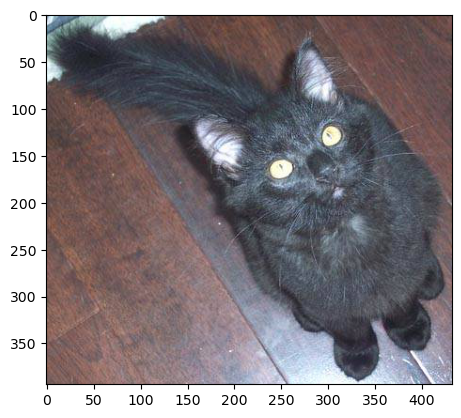

In [3]:
img=mpimg.imread('train/cat.10059.jpg')
implt=plt.imshow(img)
plt.show()

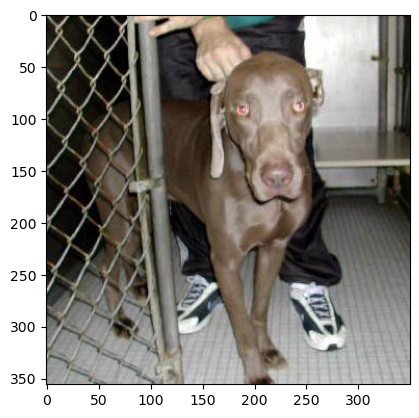

In [4]:
img=mpimg.imread('train/dog.9659.jpg')
implt=plt.imshow(img)
plt.show()

In [5]:
animal=[]
for i in range(len(contents)):
    name=contents[i]
    animal.append(name[:3])
c=0
d=0
for j in animal:
    if(j=='dog'):
        d=d+1
    elif(j=='cat'):
        c=c+1
    else:
        print(j)
print("no. of dogs=",d)
print("no. of cats=",c)

tra
no. of dogs= 12500
no. of cats= 12500


In [6]:
os.mkdir('image resized')

In [7]:
import os
from PIL import Image

original_folder = 'train'
resized_folder = 'image_resized'

# Check if the resized folder exists, and create it if not
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    new_img_path = os.path.join(resized_folder, filename)
    img.save(new_img_path)


In [8]:
#creating labels
y = []

for i in range(11500,13500):
    if animal[i] == 'dog':
        y.append(1)
    else:
        y.append(0)


In [9]:
values,counts=np.unique(y,return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


In [10]:
import glob
import cv2
import numpy as np
import os

image_directory = 'image_resized/'
image_extension = ['png', 'jpg']

files = []

# Use os.path.join to join the directory and file names
[files.extend(glob.glob(os.path.join(image_directory, '*.' + e))) for e in image_extension]

# Read images using OpenCV and convert the list to a NumPy array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [11]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [169 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [167 196 200]
   [164 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [165 194 198]
   [168 200

In [12]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [13]:
X=dog_cat_images
y=np.asarray(y)
print(len(X))
print(len(y))

2000
2000


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
X_train=X_train/255
y_train=y_train/255

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Fully connected layer before the output layer
model.add(Dense(32, activation='relu'))

# Output layer for binary classification with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)      │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 128)               │  2,769,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,798,785 (10.68 MB)

 Trainable params: 2,798,785 (10.68 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 437ms/step - accuracy: 0.5020 - loss: 0.0927
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 521ms/step - accuracy: 0.5161 - loss: 0.0306
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 564ms/step - accuracy: 0.4782 - loss: 0.0330
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.4985 - loss: 0.0317
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.5093 - loss: 0.0310


In [ ]:
evaluation = model.evaluate(, test_labels)

# Print the accuracy
accuracy = evaluation[1]  # Index 1 corresponds to accuracy
print(f'Model Accuracy on Test Set: {accuracy * 100:.2f}%')

In [ ]:
import cv2

# Path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Read and display the input image
input_image = cv2.imread(input_image_path)
cv2.imshow('Input Image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Preprocess the input image
input_image_resized = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resized / 255.0
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Make predictions
input_prediction = model.predict(image_reshaped)
print(input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the prediction
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')

Path of the image to be predicted: kitto.jpg
